In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-11 21:24:31.158031: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0
2.11.0


# Zad
Porównaj wyniki działań różnych optymalizacji
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
```
* 
```python
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
```
* 
```python
RMSprop = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
```
* 
```python
Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
```
* 
```python
Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```
* 
```python
Adam = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
```

https://keras.io/optimizers/

In [2]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('adult.data', sep=", ",header = None)
test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_44950/1127659990.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('adult.data', sep=", ",header = None)
/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_44950/1127659990.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:




dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape


X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

(30162, 41)


# SGD

In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_sgd = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [7]:
sgd = keras.optimizers.legacy.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

/Users/maja/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_sgd])

Epoch 1/100
943/943 [==============================] - 1s 998us/step - loss: 0.5466 - accuracy: 0.7469 - val_loss: 0.4724 - val_accuracy: 0.7546
Epoch 2/100
943/943 [==============================] - 1s 870us/step - loss: 0.3697 - accuracy: 0.8236 - val_loss: 0.3416 - val_accuracy: 0.8376
Epoch 3/100
943/943 [==============================] - 1s 872us/step - loss: 0.3378 - accuracy: 0.8410 - val_loss: 0.3384 - val_accuracy: 0.8398
Epoch 4/100
943/943 [==============================] - 1s 868us/step - loss: 0.3328 - accuracy: 0.8443 - val_loss: 0.3345 - val_accuracy: 0.8446
Epoch 5/100
943/943 [==============================] - 1s 868us/step - loss: 0.3301 - accuracy: 0.8452 - val_loss: 0.3290 - val_accuracy: 0.8467
Epoch 6/100
943/943 [==============================] - 1s 865us/step - loss: 0.3284 - accuracy: 0.8468 - val_loss: 0.3286 - val_accuracy: 0.8481
Epoch 7/100
943/943 [==============================] - 1s 877us/step - loss: 0.3277 - accuracy: 0.8467 - val_loss: 0.3315 - val_ac

In [9]:
history_sgd.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

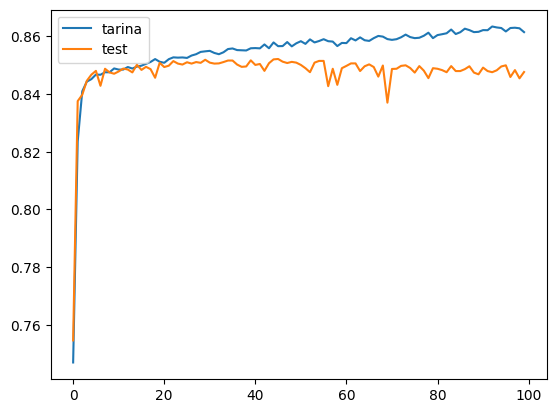

In [10]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina")
plt.plot(history_sgd.history['val_accuracy'], label = "test")
plt.legend()
plt.show()

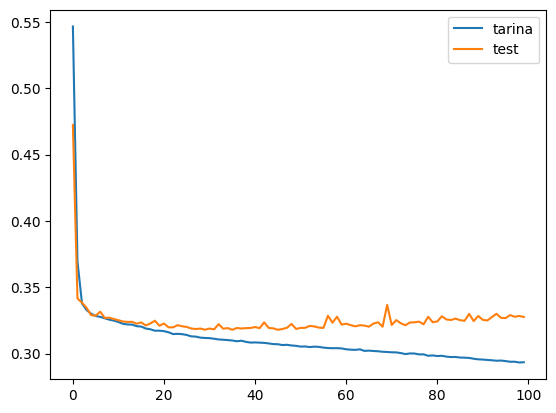

In [11]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['loss'], label = "tarina")
plt.plot(history_sgd.history['val_loss'], label = "test")
plt.legend()
plt.show()

# RMSprop

In [13]:
keras.backend.clear_session()
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_rms = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


sgd = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model.compile(loss="binary_crossentropy",optimizer=sgd, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_rms])

Epoch 1/100
943/943 [==============================] - 1s 924us/step - loss: 0.2833 - accuracy: 0.8709 - val_loss: 0.3359 - val_accuracy: 0.8487
Epoch 2/100
943/943 [==============================] - 1s 893us/step - loss: 0.2824 - accuracy: 0.8706 - val_loss: 0.3385 - val_accuracy: 0.8476
Epoch 3/100
943/943 [==============================] - 1s 900us/step - loss: 0.2823 - accuracy: 0.8703 - val_loss: 0.3437 - val_accuracy: 0.8452
Epoch 4/100
943/943 [==============================] - 1s 892us/step - loss: 0.2821 - accuracy: 0.8707 - val_loss: 0.3540 - val_accuracy: 0.8378
Epoch 5/100
943/943 [==============================] - 1s 894us/step - loss: 0.2816 - accuracy: 0.8706 - val_loss: 0.3576 - val_accuracy: 0.8384
Epoch 6/100
943/943 [==============================] - 1s 888us/step - loss: 0.2818 - accuracy: 0.8712 - val_loss: 0.3427 - val_accuracy: 0.8473
Epoch 7/100
943/943 [==============================] - 1s 892us/step - loss: 0.2814 - accuracy: 0.8712 - val_loss: 0.3604 - val_ac

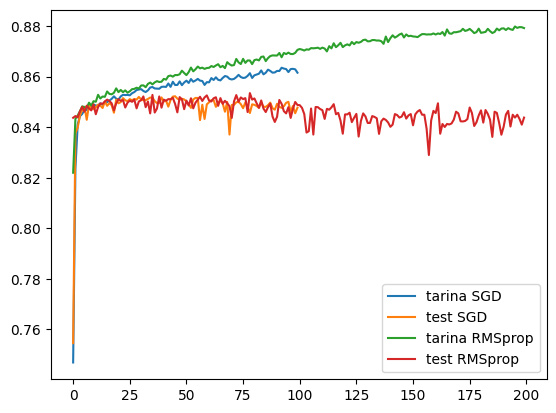

In [18]:
import matplotlib.pyplot as pl
plt.plot(history_sgd.history['accuracy'], label = "tarina SGD")
plt.plot(history_sgd.history['val_accuracy'], label = "test SGD")
plt.plot(history_rms.history['accuracy'], label = "tarina RMSprop")
plt.plot(history_rms.history['val_accuracy'], label = "test RMSprop")

plt.legend()
plt.show()

# Adagrad

In [19]:
keras.backend.clear_session()
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_adaGrad = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(loss="binary_crossentropy",optimizer=Adagrad, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_rms])


Epoch 1/100
943/943 [==============================] - 1s 916us/step - loss: 0.3218 - accuracy: 0.8499 - val_loss: 0.3263 - val_accuracy: 0.8489
Epoch 2/100
943/943 [==============================] - 1s 890us/step - loss: 0.3217 - accuracy: 0.8501 - val_loss: 0.3263 - val_accuracy: 0.8487
Epoch 3/100
943/943 [==============================] - 1s 888us/step - loss: 0.3216 - accuracy: 0.8502 - val_loss: 0.3266 - val_accuracy: 0.8492
Epoch 4/100
943/943 [==============================] - 1s 890us/step - loss: 0.3216 - accuracy: 0.8501 - val_loss: 0.3261 - val_accuracy: 0.8486
Epoch 5/100
943/943 [==============================] - 1s 888us/step - loss: 0.3214 - accuracy: 0.8504 - val_loss: 0.3266 - val_accuracy: 0.8483
Epoch 6/100
943/943 [==============================] - 1s 904us/step - loss: 0.3214 - accuracy: 0.8504 - val_loss: 0.3259 - val_accuracy: 0.8489
Epoch 7/100
943/943 [==============================] - 1s 890us/step - loss: 0.3213 - accuracy: 0.8502 - val_loss: 0.3259 - val_ac

In [28]:
history_adaGrad.history.keys()

dict_keys([])

# Adadelta

In [29]:
keras.backend.clear_session()
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history_AdaDelta = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Adadelta = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss="binary_crossentropy",optimizer=Adadelta, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_AdaDelta])


Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4168 - accuracy: 0.8068 - val_loss: 0.3537 - val_accuracy: 0.8414
Epoch 2/100
943/943 [==============================] - 1s 938us/step - loss: 0.3395 - accuracy: 0.8431 - val_loss: 0.3335 - val_accuracy: 0.8466
Epoch 3/100
943/943 [==============================] - 1s 923us/step - loss: 0.3319 - accuracy: 0.8464 - val_loss: 0.3314 - val_accuracy: 0.8460
Epoch 4/100
943/943 [==============================] - 1s 933us/step - loss: 0.3290 - accuracy: 0.8462 - val_loss: 0.3323 - val_accuracy: 0.8419
Epoch 5/100
943/943 [==============================] - 1s 920us/step - loss: 0.3259 - accuracy: 0.8472 - val_loss: 0.3262 - val_accuracy: 0.8490
Epoch 6/100
943/943 [==============================] - 1s 920us/step - loss: 0.3241 - accuracy: 0.8480 - val_loss: 0.3279 - val_accuracy: 0.8481
Epoch 7/100
943/943 [==============================] - 1s 923us/step - loss: 0.3226 - accuracy: 0.8466 - val_loss: 0.3268 - val_accu

# Adam

In [31]:
keras.backend.clear_session()


history_adam1 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Adam1 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam1, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_adam1])



Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.3774 - accuracy: 0.8234 - val_loss: 0.3446 - val_accuracy: 0.8418
Epoch 2/100
943/943 [==============================] - 1s 935us/step - loss: 0.3358 - accuracy: 0.8455 - val_loss: 0.3318 - val_accuracy: 0.8471
Epoch 3/100
943/943 [==============================] - 1s 940us/step - loss: 0.3285 - accuracy: 0.8473 - val_loss: 0.3283 - val_accuracy: 0.8475
Epoch 4/100
943/943 [==============================] - 1s 938us/step - loss: 0.3250 - accuracy: 0.8495 - val_loss: 0.3265 - val_accuracy: 0.8485
Epoch 5/100
943/943 [==============================] - 1s 933us/step - loss: 0.3230 - accuracy: 0.8503 - val_loss: 0.3252 - val_accuracy: 0.8481
Epoch 6/100
943/943 [==============================] - 1s 939us/step - loss: 0.3215 - accuracy: 0.8494 - val_loss: 0.3252 - val_accuracy: 0.8489
Epoch 7/100
943/943 [==============================] - 1s 942us/step - loss: 0.3207 - accuracy: 0.8493 - val_loss: 0.3257 - val_accu

# Adam

In [33]:
keras.backend.clear_session()

history_adam2 = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Adam2 = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="binary_crossentropy",optimizer=Adam2, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100, callbacks=[history_adam2])


Epoch 1/100
943/943 [==============================] - 1s 1ms/step - loss: 0.4358 - accuracy: 0.8012 - val_loss: 0.3550 - val_accuracy: 0.8444
Epoch 2/100
943/943 [==============================] - 1s 930us/step - loss: 0.3406 - accuracy: 0.8445 - val_loss: 0.3357 - val_accuracy: 0.8460
Epoch 3/100
943/943 [==============================] - 1s 925us/step - loss: 0.3298 - accuracy: 0.8469 - val_loss: 0.3275 - val_accuracy: 0.8483
Epoch 4/100
943/943 [==============================] - 1s 926us/step - loss: 0.3251 - accuracy: 0.8492 - val_loss: 0.3255 - val_accuracy: 0.8477
Epoch 5/100
943/943 [==============================] - 1s 926us/step - loss: 0.3219 - accuracy: 0.8504 - val_loss: 0.3234 - val_accuracy: 0.8486
Epoch 6/100
943/943 [==============================] - 1s 959us/step - loss: 0.3197 - accuracy: 0.8516 - val_loss: 0.3223 - val_accuracy: 0.8491
Epoch 7/100
943/943 [==============================] - 1s 938us/step - loss: 0.3182 - accuracy: 0.8516 - val_loss: 0.3225 - val_accu